# Assignment 1

**Handin in Peergrade**: *Monday*, September 23, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, September 27, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, September 29, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

[Answer to Ex. 1.1.10]

A defaultdict works exactly like a normal dict, but it is initialized with a function (“default factory”) that takes no arguments and provides the default value for a nonexistent key. You will never have a KeyError with a defaultdict. Keys that do not exist are given the value returned by the default factory.

In [50]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]
ans = defaultdict(lambda: [])

for i in l:
    ans[i[0]].append(i[1])

print(ans)

defaultdict(<function <lambda> at 0x110247a60>, {'a': [1, None, None], 'b': [3, True], 'c': [False]})


>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [52]:
# [Answer to Ex. 1.2.4]
import requests
import json

resp = requests.get('https://www.reddit.com/r/gameofthrones/.json', headers = {'User-agent': 'your bot 0.1'})
data = resp.json()

data['data']['children'][0]['data']['subreddit']

data['data']['children']

for i in data['data']['children']:
     print(i['data']['title'])

[NO SPOILERS] Me as Yara Greyjoy, the Iron Queen
[NO SPOILERS] The GoT cast at the Emmy Awards
[NO SPOILERS] Ser Brienne of Tarth arriving at the Emmys and serving looks
[NO SPOILERS] This reunion between Kit and Sophie is so beautiful. Put the sound up.
[NO SPOILERS] Visenya Targaryen and her dragon Vhagar
[NO SPOILERS] Outstanding Supporting Actor in a Drama Series!!
[NO SPOILERS] I felt actual fear from a fictional character.
[No Spoilers] Kit Harington Talking about Controversies of Game of Thrones at Emmys.
[NO SPOILERS] If she doesn't win an Emmy tonight she's won my heart. Looks, personality and all.
[NO SPOILERS] GoT won this award only because of the Cast and Crew, the people who actually worked hard for it. Congratulations to every single person in crew, background actors, technician and everyone in between, you all deserved it. Except of course DnD.
[NO SPOILERS] Lena Headey arriving at the Emmys. Absolutely breathtaking!
[NO SPOILERS] Gwendoline Christie’s reaction to appla

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [53]:
data['data'].keys()
spoiler_count = 0

tempdata = data['data']['children']
for i in tempdata: #loops through every post
    s = i['data']['title']
    s = s.lower() #makes titles lowercase
    if "no spoilers" not in s and "spoilers" in s: 
        spoiler_count+=1

print("There are %d posts with spoilters"%spoiler_count)

for i in data['data']['children']:
    temp = i['data']['title']
    test = temp.lower()
    if "no spoilers" in test:
        print(i['data']['title'])

There are 2 posts with spoilters
[NO SPOILERS] Me as Yara Greyjoy, the Iron Queen
[NO SPOILERS] The GoT cast at the Emmy Awards
[NO SPOILERS] Ser Brienne of Tarth arriving at the Emmys and serving looks
[NO SPOILERS] This reunion between Kit and Sophie is so beautiful. Put the sound up.
[NO SPOILERS] Visenya Targaryen and her dragon Vhagar
[NO SPOILERS] Outstanding Supporting Actor in a Drama Series!!
[NO SPOILERS] I felt actual fear from a fictional character.
[No Spoilers] Kit Harington Talking about Controversies of Game of Thrones at Emmys.
[NO SPOILERS] If she doesn't win an Emmy tonight she's won my heart. Looks, personality and all.
[NO SPOILERS] GoT won this award only because of the Cast and Crew, the people who actually worked hard for it. Congratulations to every single person in crew, background actors, technician and everyone in between, you all deserved it. Except of course DnD.
[NO SPOILERS] Lena Headey arriving at the Emmys. Absolutely breathtaking!
[NO SPOILERS] Gwendo

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [19]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        #print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("news", 500, count=25)
x1, y1 = get_x_y("blackmirror", 500, count=25)

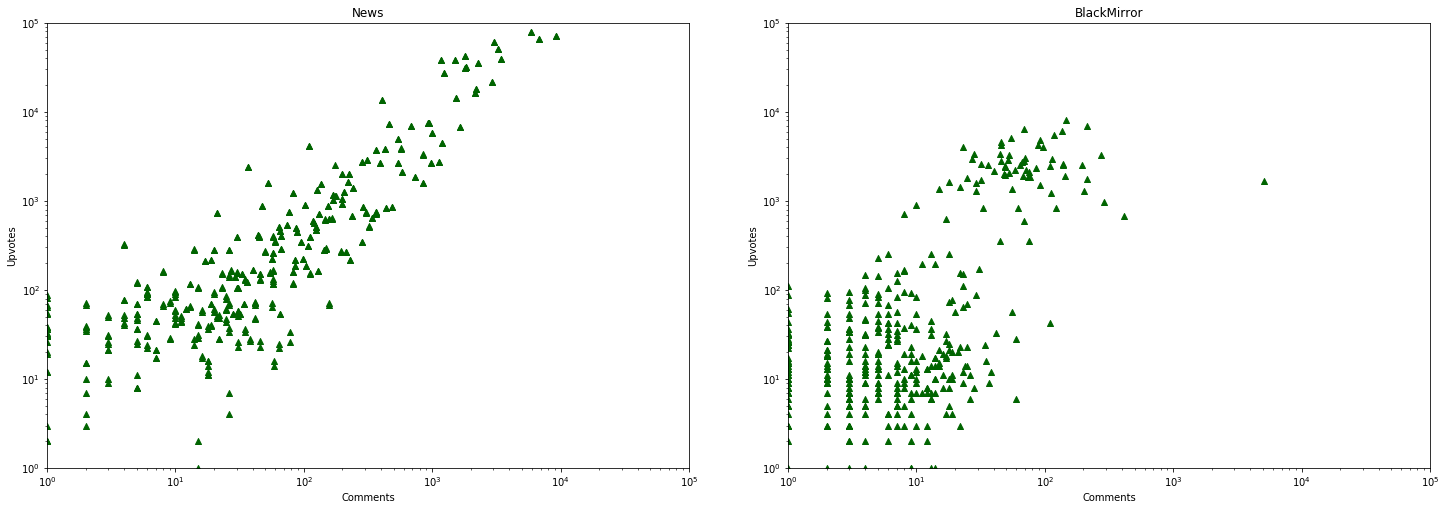

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,7))

ax = fig.add_subplot(121)
ax.scatter(x,
 y,
 color='darkgreen',
 marker='^')
ax.set(title='News', 
 ylabel='Upvotes', xlabel='Comments')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,100000)
plt.ylim(1,100000)


ax1 = fig.add_subplot(122)
ax1.scatter(x1,
 y1,
 color='darkgreen',
 marker='^')
ax1.set(title='BlackMirror', 
 ylabel='Upvotes', xlabel='Comments')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,100000)
plt.ylim(1,100000)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
plt.show()

**Ex. 2.1.2.4**
There were a lot more posts with a high number of upvotes and comments

The TV show lagged behind. 


>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [51]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_d7y6dw
Retrieved 25 posts from page t3_d7i9ah
Retrieved 25 posts from page t3_d7jfvx
Retrieved 25 posts from page t3_d7jda1
Retrieved 25 posts from page t3_d761v5
Retrieved 25 posts from page t3_d6w6my
Retrieved 25 posts from page t3_d6x436
Retrieved 25 posts from page t3_d6xw9o
Retrieved 25 posts from page t3_d6mnzp
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_d7y6dw
Retrieved 25 posts from page t3_d7i9ah
Retrieved 25 posts from page t3_d7jfvx
Retrieved 25 posts from page t3_d7jda1
Retrieved 25 posts from page t3_d761v5
Retrieved 25 posts from page t3_d6w6my
Retrieved 25 posts from page t3_d6x436
Retrieved 25 posts from page t3_d6xw9o
Retrieved 25 posts from page t3_d6mnzp


In [22]:
X

array([[ 2263, 18548, 18548, ...,     0,     3,     0],
       [  194,  1296,  1296, ...,     0,     0,     0],
       [  314,  3002,  3002, ...,     0,     1,     0],
       ...,
       [    2,    15,    15, ...,     0,     0,     0],
       [    5,    10,    10, ...,     0,     0,     0],
       [   20,    62,    62, ...,     0,     0,     0]])

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

shape of matrix x: (487, 10)
shape of matrix y: (10, 10)
[[9.31712613e+05 9.97442970e+06 9.97442970e+06 0.00000000e+00
  0.00000000e+00 2.65423090e+03 0.00000000e+00 0.00000000e+00
  3.21111576e+03 0.00000000e+00]
 [9.97442970e+06 1.28644242e+08 1.28644242e+08 0.00000000e+00
  0.00000000e+00 4.27953219e+04 0.00000000e+00 0.00000000e+00
  3.70756184e+04 0.00000000e+00]
 [9.97442970e+06 1.28644242e+08 1.28644242e+08 0.00000000e+00
  0.00000000e+00 4.27953219e+04 0.00000000e+00 0.00000000e+00
  3.70756184e+04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.65423090e+03 4.27953219e+04 4.27953219e+04 0.00000000e+00
  0.00000000e+00 4.75669920e+02 0.00000000e+00 0.00000000e+00
  1.35220338e+01 0.00000000e+00]
 

Text(0.5, 1.0, 'Distribution of Covariances')

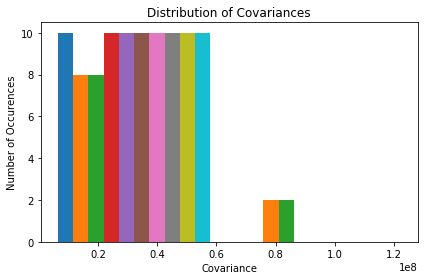

In [24]:
#2.2.4.1
X

print("shape of matrix x:", np.shape(X))

y = np.cov(X, rowvar = False)

print("shape of matrix y:", np.shape(y))

print(y)

#2.2.4.2
#Yes, it appears all the values are either really big or 0. 
#Really big values mean that there is a positive covariance and really large value of 
#one variable lead to the other variable to also be very large. 
#When the values are 0 it means that there is no correlation.


#2.2.4.3
n_bins = 2

fig, axs1 = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs1.hist(y, bins=n_bins)
axs1.set_ylabel('Number of Occurences')
axs1.set_xlabel('Covariance')
axs1.set_title('Distribution of Covariances')

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

[2.2.5.1] 

pca.components_ is a matrix that allows you to identify the correlations between the components and original variables. This matrix gives you the eigenvectors of the covariance matrix.

[2.2.5.2] 

This vector represents the variance explained by each principle component. A high value for a component of this vector means the components gives us more meaningful information about the data.

<function matplotlib.pyplot.show(*args, **kw)>

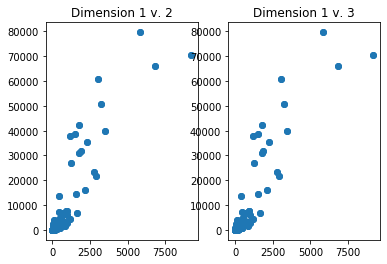

In [58]:
plt.subplot(1,2,1)
plt.title("Dimension 1 v. 2")

plt.scatter(X[:,0], X[:,1])
plt.subplot(1, 2, 2)
plt.title("Dimension 1 v. 3")
plt.scatter(X[:,0], X[:,2])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

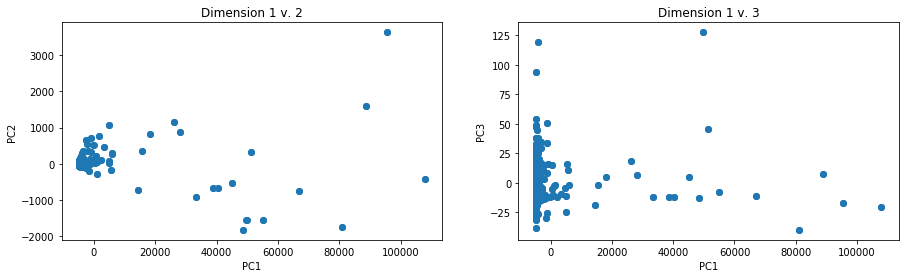

In [71]:
#2.2.5.3
fig = plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("Dimension 1 v. 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
new_X = pca.transform(X)
plt.scatter(new_X[:,0], new_X[:,1])
plt.subplot(1, 2, 2)
plt.title("Dimension 1 v. 3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.scatter(new_X[:,0], new_X[:,2])

plt.show

[2.2.5.3]

The data no longer appears positively linear. There are negative y values and the x-scale is 10 times larger while the y-scale is significantly smaller. It is possible that all points in the cluster surrounding (0, 0) represent a common characteristic.

[2.2.5.4]

Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?
This scatter plot also has a bit of clustering. Possibly by labeling/identifying points from the first graph in the second graph to see if they lie in the comparable cluster or not, we could identify what the clusters represent.


>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [95]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

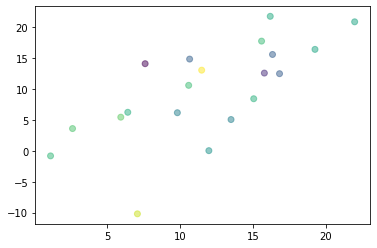

In [101]:
# Why not make a scatter plot here, to see what you're working with?
colors = np.random.rand(20)

plt.scatter(x, y, c=colors,alpha=0.5)
plt.show()

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

<function matplotlib.pyplot.show(*args, **kw)>

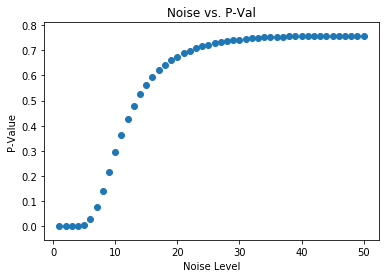

In [56]:
#2.3.4
import scipy as sp

pvals = []


for noise in range(1,51):
    np.random.seed(0)
    x = np.arange(0, 20) + np.random.normal(size=20) * noise
    y = np.arange(0, 20) + np.random.normal(size=20) * noise
    pvals += [sp.stats.pearsonr(x, y)[1]]

plt.scatter(list(range(1,51)), pvals)

plt.xlabel('Noise Level')
plt.ylabel('P-Value')
plt.title('Noise vs. P-Val')
plt.show 

In [57]:
for i in pvals:
    print(i > 0.05, end=', ')

pvals

False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, 

[4.979017785420303e-13,
 5.485144411868272e-08,
 2.153785149741264e-05,
 0.0007538104370477065,
 0.007011034737116245,
 0.029443657868153488,
 0.075449812549223,
 0.14155847837554913,
 0.21761794681222557,
 0.2939692287045563,
 0.36455746136641154,
 0.4267088941585068,
 0.47990926596201056,
 0.5247425920674228,
 0.5622278687783582,
 0.5934696632100379,
 0.619498751206097,
 0.6412136005877586,
 0.6593703847996758,
 0.674593829210814,
 0.6873952248620528,
 0.6981913329091346,
 0.7073215944588951,
 0.7150628177432555,
 0.7216412990600626,
 0.7272426455225276,
 0.7320196586684563,
 0.7360986326363146,
 0.7395843784552659,
 0.7425642344120224,
 0.7451112731650142,
 0.7472868735479095,
 0.7491427897281919,
 0.7507228220359565,
 0.7520641713418496,
 0.7531985412610226,
 0.7541530387125895,
 0.754950912647055,
 0.7556121623993854,
 0.7561540406043687,
 0.7565914705106265,
 0.756937393529977,
 0.7572030597128947,
 0.7573982713578429,
 0.7575315879961828,
 0.7576104994315197,
 0.7576415722659364

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [14]:
import json
import requests as rq
import numpy as np
import matplotlib.pyplot as plt

conkey = ''
villain_list = []
while True:
    villains = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&prop=revisions&rvprop=content&cmlimit=500&cmcontinue="+conkey).json()
    villain_list.extend([d['title'] for d in villains['query']['categorymembers']])
    try: 
        conkey = villains['continue']['cmcontinue']
    except:
        break
        
conkey = ''
hero_list = []
while True:
    superheros = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&prop=revisions&rvprop=content&cmlimit=500&cmcontinue=" + conkey).json()
    hero_list.extend([d['title'] for d in superheros['query']['categorymembers']])
    try:
        conkey = superheros['continue']['cmcontinue']
    except:
        break

print('There are %d heros in marvel\n'%len(hero_list))
print('There are %d villains in marvel\n'%len(villain_list))
intersection = set(villain_list) & set(hero_list)
print('There are %d characters that are both heros and villains in marvel\n'%len(intersection))
union = set(villain_list) | set(hero_list)

jaccard = len(intersection)/len(union)
print('The jaccard similarity is %f \n'%jaccard)

There are 835 heros in marvel

There are 1094 villains in marvel

There are 149 characters that are both heros and villains in marvel

The jaccard similarity is 0.083708 



>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

In [15]:
only_villain_list = set(villain_list) - set(hero_list)
only_hero_list = set(hero_list) - set(villain_list)
ambiguous = list(intersection)

In [11]:
page_lengths_villains = []  

for i in only_villain_list:
    character = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&titles="+i,headers = {'User-agent': 'funbot'}).json()
    text = list(character['query']['pages'].values())[0]['revisions'][0]['*']
    page_lengths_villains.append(len(text))

In [6]:
page_lengths_heros = []

for i in only_hero_list:
    character = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&titles="+i,headers = {'User-agent': 'coolbot'}).json()
    text = list(character['query']['pages'].values())[0]['revisions'][0]['*']
    page_lengths_heros.append(len(text))

In [5]:
page_lengths_ambig = []

for i in ambiguous:
    character = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&titles="+i,headers = {'User-agent': 'swagbot'}).json()
    text = list(character['query']['pages'].values())[0]['revisions'][0]['*']
    page_lengths_ambig.append(len(text))

Text(0.5, 0, 'Length of Page')

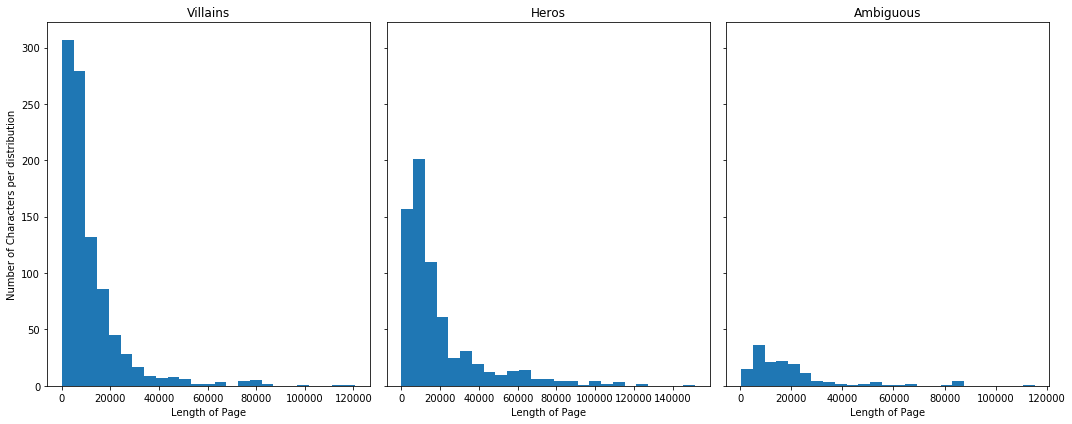

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 25

# replace x, y, z with list of hero, villain, ambig
x = page_lengths_villains
y = page_lengths_heros
z = page_lengths_ambig

fig, (axs1,axs2,axs3) = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize = (15,6))

# We can set the number of bins with the `bins` kwarg
axs1.hist(x, bins=n_bins)
axs1.set_ylabel('Number of Characters per distribution')
axs1.set_xlabel('Length of Page')
axs1.set_title('Villains')
axs2.hist(y, bins=n_bins)
axs2.set_title('Heros')
axs2.set_xlabel('Length of Page')
axs3.hist(z, bins=n_bins)
axs3.set_title('Ambiguous')
axs3.set_xlabel('Length of Page')

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

In [23]:
full_list = list(union)
charac_dict = {}

#creates dictionary with every character, key is the name and the value is num of chars character's on page
for i in full_list:
    character = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&titles="+i,headers = {'User-agent': 'super bot'}).json()
    text = list(character['query']['pages'].values())[0]['revisions'][0]['*']
    length = len(text)
    charac_dict.update( {i : length} )

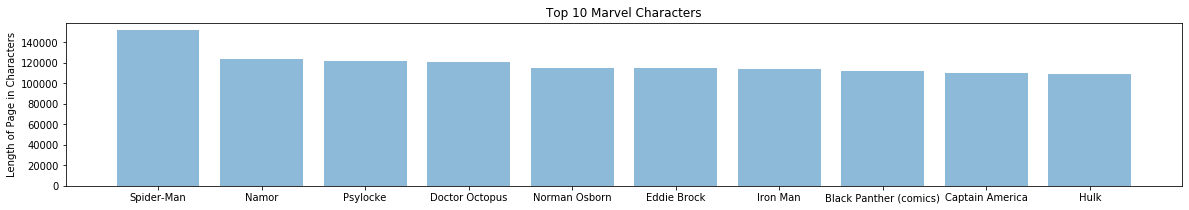

In [26]:
#sorted dictionary in descending order
sorted_dict = sorted(charac_dict.items(), reverse=True,key=lambda x: x[1])
x =[]
y = []

#took the top the 10 values and made a list of the names and another list with corresponding num of chars on page
for i in range(10):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

#Bar Plot of each character and its number of characters on page
import numpy as np
import matplotlib.pyplot as plt

objects = x
y_pos = np.arange(len(objects))
performance = y
plt.figure(figsize=(20, 3))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Length of Markup Page')
plt.ylabel('Characters')
plt.title('Top 10 Marvel Characters with Largest Wikipedia Page')
plt.show()

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

In [17]:
import re
import json
import requests as rq

def retrieve_debut_yrs(name_list):
    debut_years = []  
    for i in name_list:
        character = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&prop=revisions&rvprop=content&titles="+i,headers = {'User-agent': 'sneakybot'}).json()
        markup_text = str(list(character['query']['pages'].values())[0]['revisions'][0]['*'])
        debut_yr_list = re.findall(r'debut.+?\d{4}', markup_text)
        while len(debut_yr_list)>0:
            debut_years.append(debut_yr_list[0][-4:])
            debut_yr_list.remove(debut_yr_list[0])            
    return debut_years

In [20]:
debut_years_villains = retrieve_debut_yrs(only_villain_list)
debut_years_hero = retrieve_debut_yrs(only_hero_list)
debut_years_ambig = retrieve_debut_yrs(ambiguous)

In [49]:
year = [] #for time series need x-axis with every year from the first release of a marvel character in 1939 until 2019
start = 1936
for i in range(81):
    start +=1
    year.append(start)
    
#counts number of villains debuted for each year and puts in a list, puts 0 if there were none
vil_count=[]
for i in year:
    count=0
    for j in debut_years_villains:
        if str(i)==j:
            count+=1
    vil_count.append(count)

#counts number of heroes debuted for each year and puts in a list, puts 0 if there were none
hero_count=[]
for i in year:
    count=0
    for j in debut_years_hero:
        if str(i)==j:
            count+=1
    hero_count.append(count)

#counts number of ambig heroes debuted for each year and puts in a list, puts 0 if there were none
ambig_count=[]
for i in year:
    count=0
    for j in debut_years_ambig:
        if str(i)==j:
            count+=1
    ambig_count.append(count)

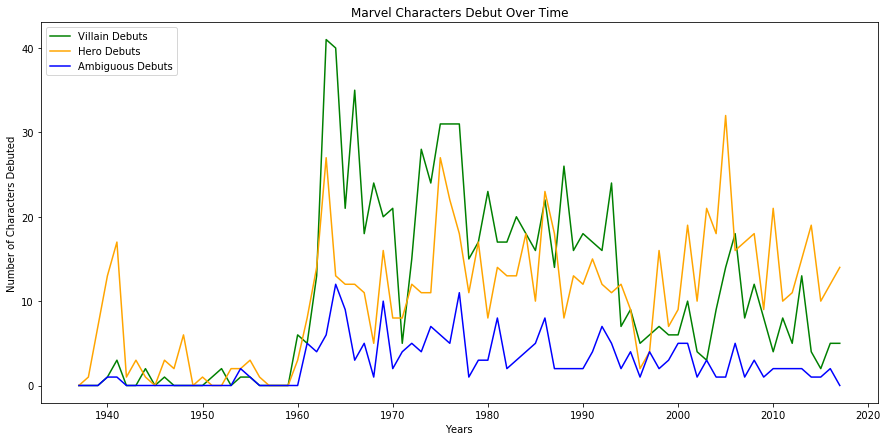

In [47]:
#Visualization

#line plot with time on the x axis, num of characters debut on y-axis, color coded for heroes villains and ambig
#line plot makes it easy to watch the progression overtime
#replace with real data
fig = plt.figure(figsize = (15,7))
plt.plot(year, vil_count, color='g',label= 'Villain Debuts')
plt.plot(year, hero_count, color='orange',label= 'Hero Debuts')
plt.plot(year, ambig_count, color='b',label= 'Ambiguous Debuts')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Number of Characters Debuted')
plt.title('Marvel Characters Debut Over Time')
plt.show()